In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity

import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

import random

In [2]:
wwo_data = pd.read_csv("Lab1/sample.csv")

(array([ 13.,  66.,  52., 140., 123., 114., 165., 199., 108.,  20.]),
 array([-14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.]),
 <BarContainer object of 10 artists>)

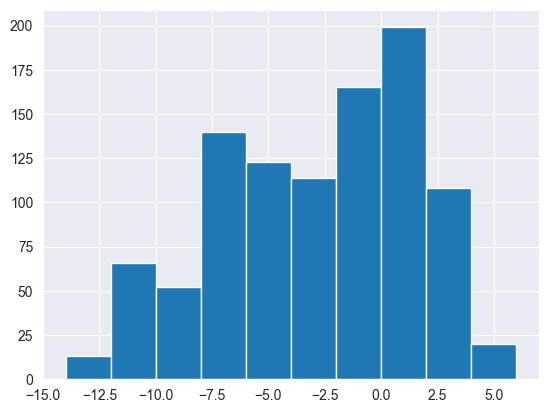

In [3]:
plt.hist(wwo_data['maxtempC'])

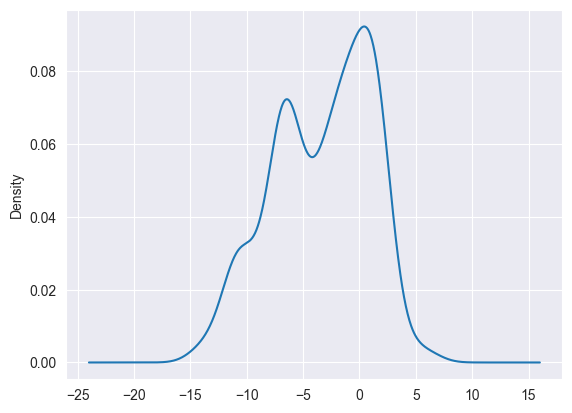

In [4]:
a = wwo_data['maxtempC'].plot.kde(bw_method=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f06baa470>,
 'caps': [<matplotlib.lines.Line2D at 0x16f06baaa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f06baa1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f06baafb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f06bab280>],
 'means': []}

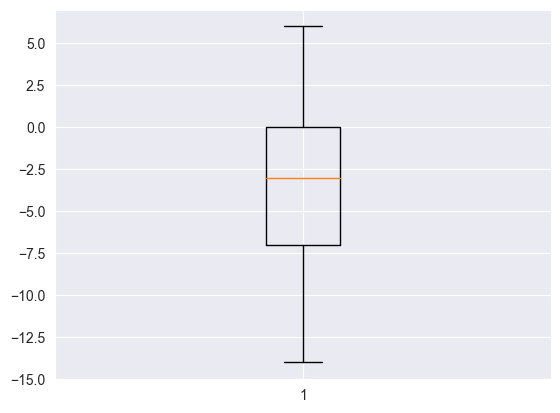

In [5]:
matplotlib.pyplot.boxplot(wwo_data['maxtempC'])

(array([820.,  61.,  29.,   0.,  13.,  35.,  17.,  12.,   0.,  13.]),
 array([ 0.  ,  3.37,  6.74, 10.11, 13.48, 16.85, 20.22, 23.59, 26.96,
        30.33, 33.7 ]),
 <BarContainer object of 10 artists>)

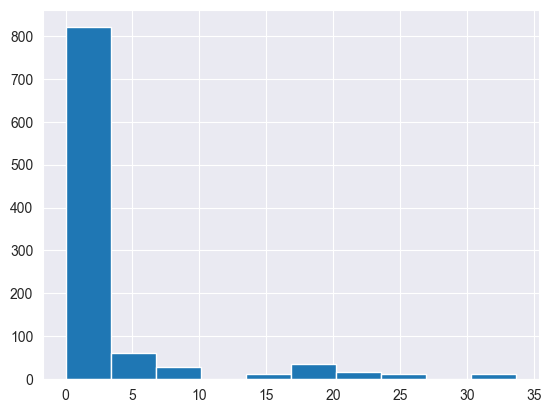

In [6]:
plt.hist(wwo_data['totalSnow_cm'])

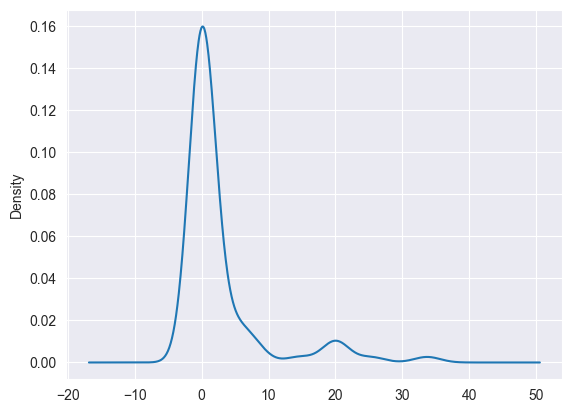

In [7]:
a = wwo_data['totalSnow_cm'].plot.kde(bw_method=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f0bd5ba60>,
 'caps': [<matplotlib.lines.Line2D at 0x16f0bd84040>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f0bd5b790>],
 'medians': [<matplotlib.lines.Line2D at 0x16f0bd845e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f0bd848b0>],
 'means': []}

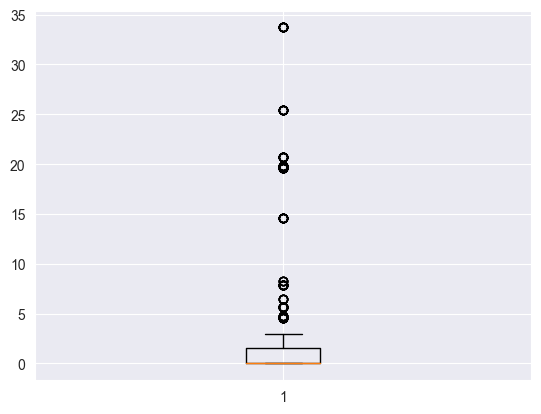

In [8]:
matplotlib.pyplot.boxplot(wwo_data['totalSnow_cm'])

(array([ 94., 138., 342., 204.,  87.,  84.,  32.,  16.,   0.,   3.]),
 array([ 2. ,  5.4,  8.8, 12.2, 15.6, 19. , 22.4, 25.8, 29.2, 32.6, 36. ]),
 <BarContainer object of 10 artists>)

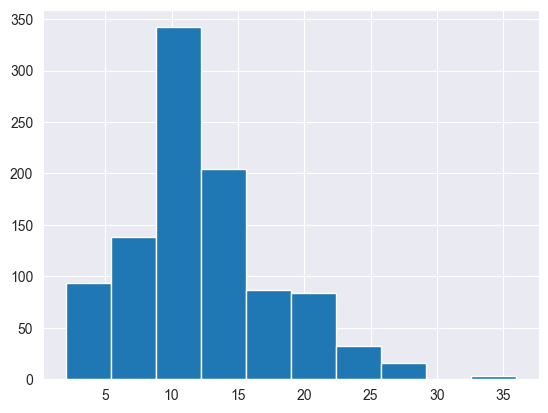

In [9]:
plt.hist(wwo_data['windspeedKmph'])

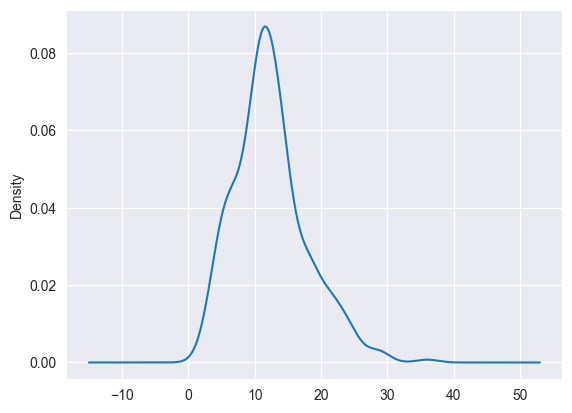

In [10]:
a = wwo_data['windspeedKmph'].plot.kde(bw_method=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f0bfe9d20>,
 'caps': [<matplotlib.lines.Line2D at 0x16f0bfea2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f0bfe9a50>],
 'medians': [<matplotlib.lines.Line2D at 0x16f0bfea860>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f0bfeab30>],
 'means': []}

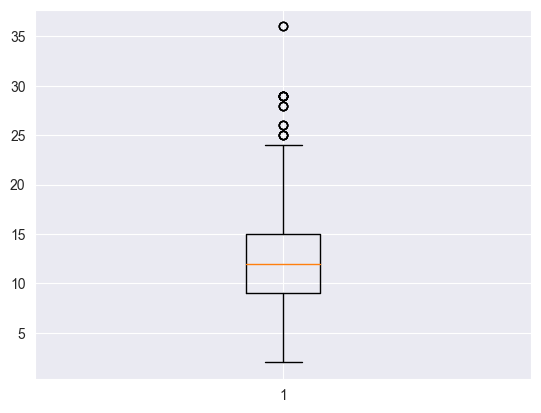

In [11]:
matplotlib.pyplot.boxplot(wwo_data['windspeedKmph'])

(array([ 20.,  39.,  61.,  77., 121., 140., 227., 158., 142.,  15.]),
 array([-25. , -22.2, -19.4, -16.6, -13.8, -11. ,  -8.2,  -5.4,  -2.6,
          0.2,   3. ]),
 <BarContainer object of 10 artists>)

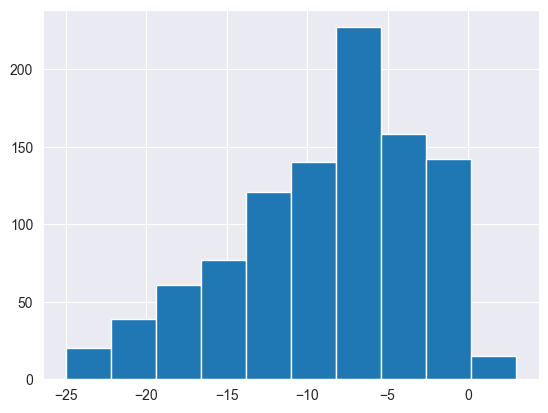

In [12]:
plt.hist(wwo_data['FeelsLikeC'])

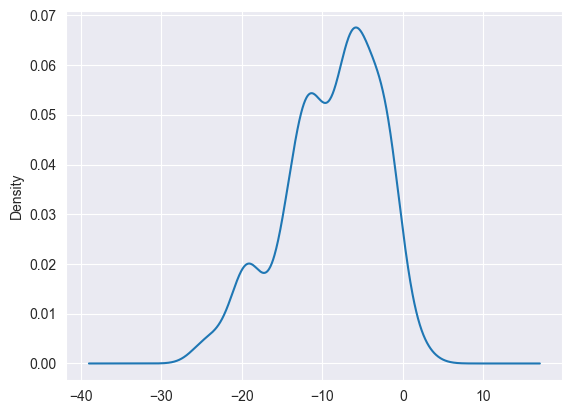

In [13]:
a = wwo_data['FeelsLikeC'].plot.kde(bw_method=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f06b00c70>,
 'caps': [<matplotlib.lines.Line2D at 0x16f069e9ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f06b01a50>],
 'medians': [<matplotlib.lines.Line2D at 0x16f06855510>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f06855060>],
 'means': []}

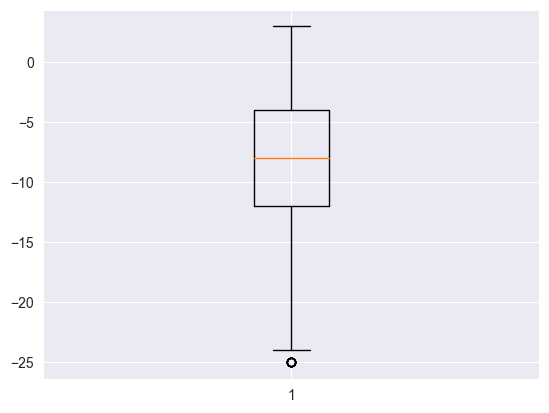

In [14]:
matplotlib.pyplot.boxplot(wwo_data['FeelsLikeC'])

In [15]:
np.random.choice(wwo_data['tempC'], 10)

array([ -6,   1,   1,   0, -11,  -7,  -9,  -6,   1,  -1], dtype=int64)

(array([ 49.,  86.,  39., 166., 135., 101., 175., 199.,  39.,  11.]),
 array([-15. , -12.9, -10.8,  -8.7,  -6.6,  -4.5,  -2.4,  -0.3,   1.8,
          3.9,   6. ]),
 <BarContainer object of 10 artists>)

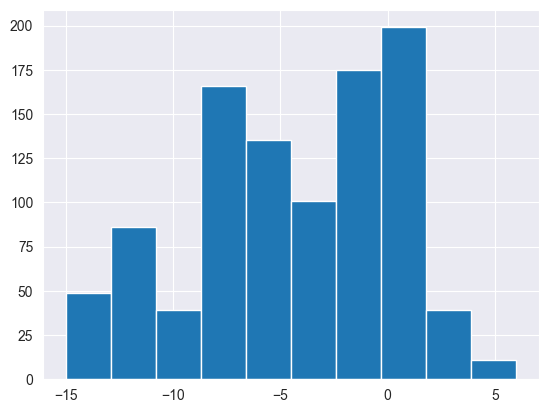

In [16]:
plt.hist(wwo_data['tempC'])

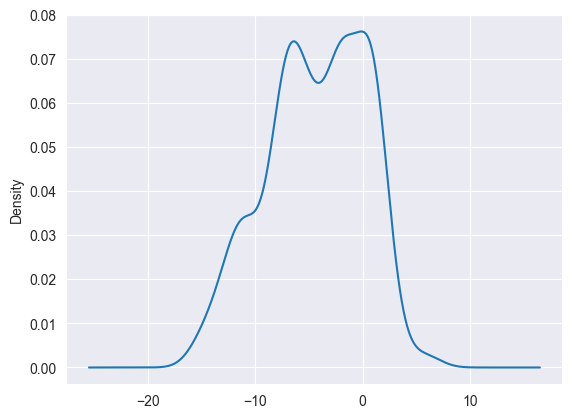

In [17]:
a = wwo_data['tempC'].plot.kde(bw_method=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f0c1a68f0>,
 'caps': [<matplotlib.lines.Line2D at 0x16f0c1a6e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f0c1a6620>],
 'medians': [<matplotlib.lines.Line2D at 0x16f0c1a7430>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f0c1a7700>],
 'means': []}

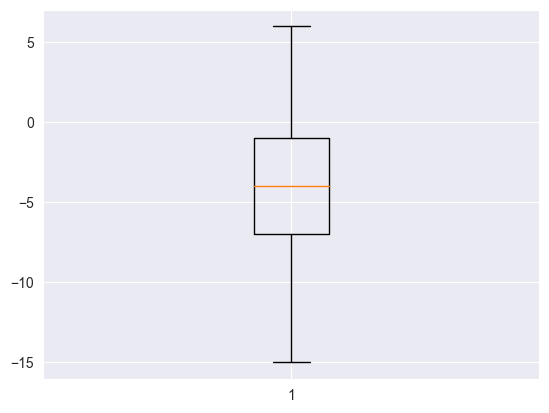

In [18]:
matplotlib.pyplot.boxplot(wwo_data['tempC'])

In [19]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 18.40it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.705801,661.585317,-6359.905083,inf,0.123315,1.034971e-13
lognorm,1.706638,663.809465,-6352.506713,inf,0.125824,2.934042e-14
gamma,1.707993,661.893833,-6351.713157,inf,0.128661,6.840067e-15
chi2,1.709036,663.583281,-6351.102830,inf,0.127134,1.503914e-14
rayleigh,1.726119,638.990789,-6348.064037,inf,0.158214,2.483449e-22


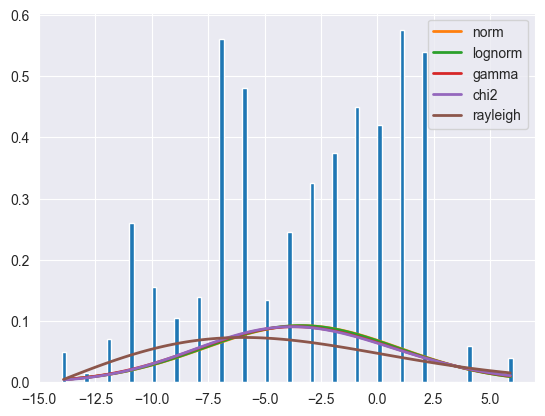

In [20]:
f = Fitter(wwo_data['maxtempC'],
          distributions = get_common_distributions()
          )
f.fit()
f.summary()

In [21]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': -3.341, 'scale': 4.314014255887432}}

In [22]:
f.get_best(method = "bic")

{'norm': {'loc': -3.341, 'scale': 4.314014255887432}}

In [59]:
from scipy.stats import norm, kstest
kstest(wwo_data['maxtempC'], cdf=lambda x: norm.cdf(x, loc = -3.341, scale = 4.314))

KstestResult(statistic=0.12331522747221935, pvalue=1.0346533526160433e-13)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 17.45it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,3.771024,792.190167,-5559.685411,inf,0.659000,0.0
expon,3.779463,1441.343134,-5564.357838,inf,0.684963,0.0
exponpow,3.877716,1164.388929,-5531.785722,inf,0.653594,0.0
gamma,3.977121,834.901585,-5506.473708,inf,0.680781,0.0
chi2,4.039930,830.571512,-5490.804600,inf,0.685690,0.0


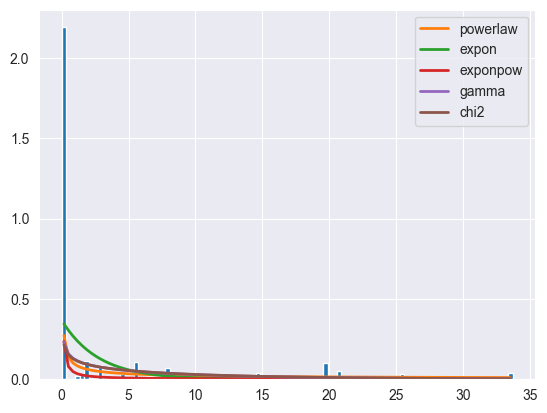

In [23]:
f = Fitter(wwo_data['totalSnow_cm'],
          distributions = get_common_distributions() 
          )
f.fit()
f.summary()

In [24]:
f.get_best(method = 'sumsquare_error')

{'powerlaw': {'a': 0.38838560921267995,
  'loc': -1.684820171903115e-26,
  'scale': 41.11006601232151}}

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 24.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.371446,894.812934,-7884.292510,inf,0.098776,6.041225e-09
lognorm,0.373999,884.056620,-7870.535327,inf,0.091920,8.380144e-08
chi2,0.374564,884.824069,-7869.025151,inf,0.096147,1.693681e-08
gamma,0.374564,884.824399,-7869.025025,inf,0.096148,1.693081e-08
rayleigh,0.375121,896.122449,-7874.446460,inf,0.101212,2.267561e-09


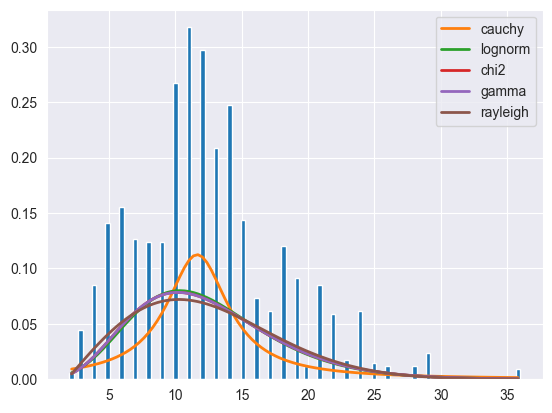

In [25]:
f = Fitter(wwo_data['windspeedKmph'],
          distributions = get_common_distributions() 
          )
f.fit()
f.summary()

In [26]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 11.637208293855371, 'scale': 2.8297116375524167}}

In [27]:
f.get_best(method = 'aic')

{'uniform': {'loc': 2.0, 'scale': 34.0}}

In [28]:
f.get_best(method = 'bic')

{'cauchy': {'loc': 11.637208293855371, 'scale': 2.8297116375524167}}

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 19.01it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.577150,744.521482,-7443.593176,inf,0.111761,2.463066e-11
lognorm,0.578246,751.024717,-7434.787984,inf,0.116846,2.368885e-12
gamma,0.578558,745.606373,-7434.247909,inf,0.113729,1.007718e-11
chi2,0.580380,748.563993,-7431.104285,inf,0.121186,2.954305e-13
cauchy,0.589342,790.535755,-7422.688638,inf,0.135056,2.276938e-16


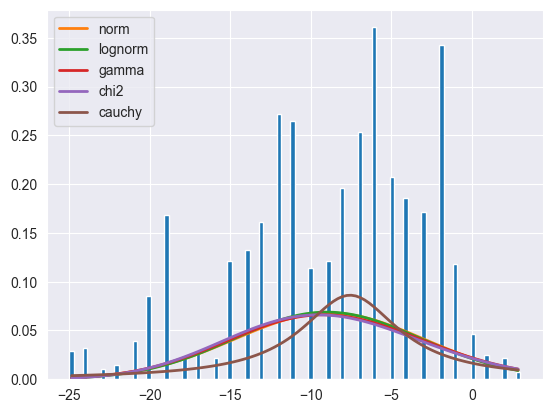

In [29]:
f = Fitter(wwo_data['FeelsLikeC'],
          distributions = get_common_distributions() 
          )
f.fit()
f.summary()

In [30]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': -8.867, 'scale': 5.870886730298925}}

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 19.98it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.504878,668.732574,-6485.228264,inf,0.122546,1.515182e-13
lognorm,1.505199,671.376961,-6478.106775,inf,0.122537,1.521843e-13
gamma,1.506204,669.306605,-6477.439427,inf,0.126646,1.930536e-14
chi2,1.507318,669.446544,-6476.700329,inf,0.128955,5.872570e-15
rayleigh,1.524721,647.904953,-6472.128513,inf,0.154097,3.350678e-21


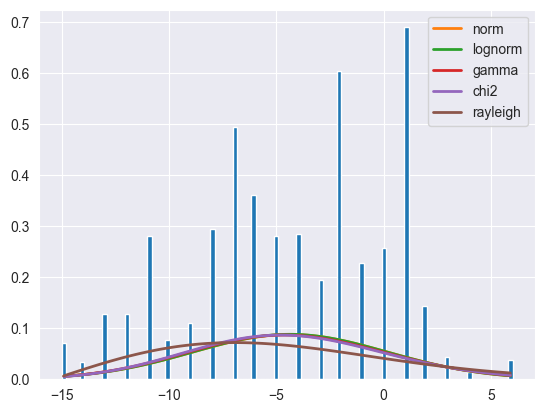

In [31]:
f = Fitter(wwo_data['tempC'],
          distributions = get_common_distributions()  ) 
          
f.fit()
f.summary()

In [32]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': -4.362, 'scale': 4.540369588480655}}

In [33]:
f.get_best(method = 'bic')

{'norm': {'loc': -4.362, 'scale': 4.540369588480655}}

In [34]:
from statsmodels.api import qqplot

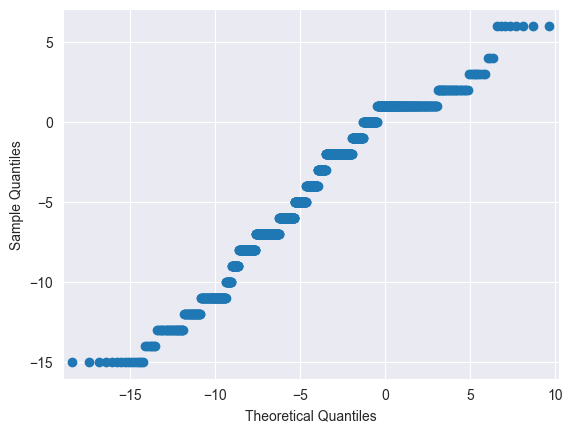

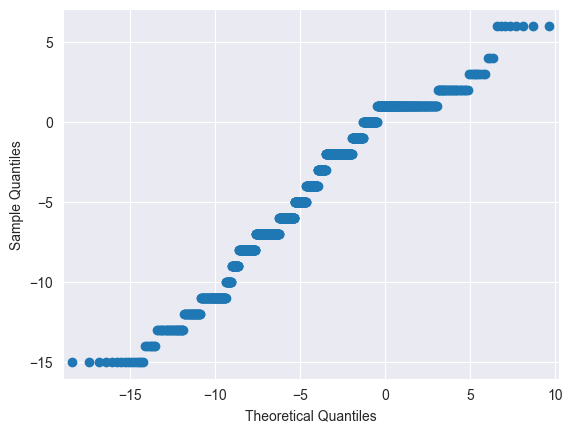

In [35]:
qqplot(data=wwo_data['tempC'], loc=-4.362, scale=4.540369588480655)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 32.89it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,215.514802,-65.477224,-1514.002420,inf,0.169020,1.922171e-25
uniform,217.230769,-82.156583,-1512.979527,inf,0.142227,4.106733e-18
chi2,233.270209,-25.482352,-1434.834536,inf,0.179877,8.819990e-29
rayleigh,235.412599,-42.420447,-1432.600055,inf,0.172948,1.260564e-26
exponpow,237.509942,-53.496208,-1416.822529,inf,0.159665,9.756381e-23


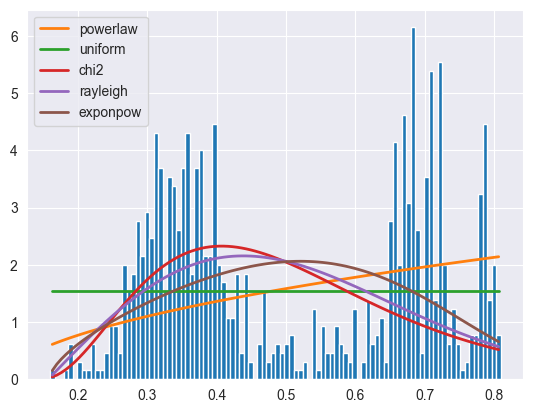

In [36]:
f = Fitter(wwo_data['Friction_mean'],
          distributions = get_common_distributions()  )

f.fit()
f.summary()

In [37]:
f.get_best(method="bic")

{'powerlaw': {'a': 1.534765595353098,
  'loc': 0.09528860395607229,
  'scale': 0.7147113969751449}}

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,36.207316,351.932479,-3297.770827,inf,0.208782,1.025949e-38
chi2,37.864889,765.514629,-3253.007729,inf,0.160000,7.856278e-23
expon,49.223246,775.664036,-2997.573778,inf,0.160000,7.856278e-23
powerlaw,66.886574,238.283102,-2684.033746,inf,0.367404,1.492228e-121
lognorm,94.117617,548.664690,-2342.486771,inf,0.384408,1.901123e-133


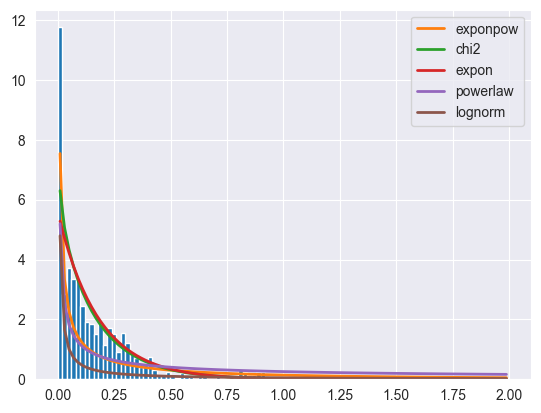

In [38]:
f = Fitter(wwo_data['Water_mean'],
          distributions = get_common_distributions()
          )
f.fit()
f.summary()

In [39]:
f.get_best(method='bic'), f.get_best(method='sumsquare_error')

({'exponpow': {'b': 0.29128911097903876,
   'loc': -4.950102728563352e-31,
   'scale': 0.9046178480388979}},
 {'exponpow': {'b': 0.29128911097903876,
   'loc': -4.950102728563352e-31,
   'scale': 0.9046178480388979}})

In [42]:
from scipy.stats import exponpow, kstest
kstest(wwo_data['Water_mean'], cdf = lambda x: exponpow.cdf(x, b = 0.291, loc = 0, scale = 0.905))

KstestResult(statistic=0.20873025420706393, pvalue=1.0721728758010976e-38)

In [49]:
from statsmodels.api import qqplot

qqplot(wwo_data, dist = exponpow.ppf, distargs=(0.291, ), loc = 0, scale=0.905)

TypeError: Initializing the distribution failed.  This can occur if distargs contains loc or scale. The distribution initialization command is:
dist(0.291, 0, 0.905, loc=0, scale=1)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.005037,987.137192,-12177.887189,0.117131,0.064806,4.282779e-04
exponpow,0.005291,968.143488,-12128.787587,0.120670,0.073067,4.347125e-05
gamma,0.005376,982.153650,-12112.788659,0.119594,0.062457,7.806439e-04
powerlaw,0.005784,918.687735,-12039.611327,0.118121,0.112915,1.461266e-11
expon,0.006347,975.292865,-11953.647727,0.130122,0.076898,1.370684e-05


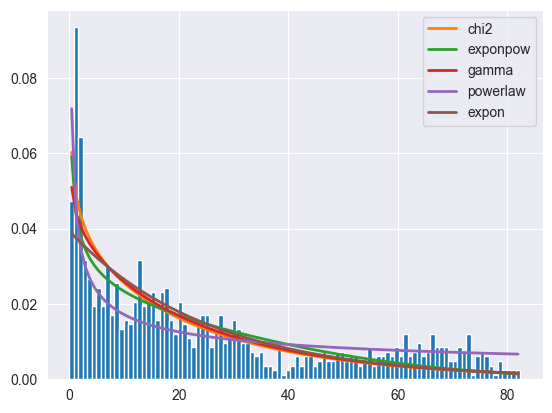

In [50]:
f = Fitter(wwo_data['Speed_mean'],
          distributions = get_common_distributions()
          )
f.fit()
f.summary()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000210,1527.422733,-15355.050066,inf,0.036094,1.441298e-01
chi2,0.000344,1617.231133,-14862.183128,inf,0.069351,1.258562e-04
cauchy,0.000537,1482.652550,-14423.627688,inf,0.145975,4.628233e-19
rayleigh,0.000629,1861.146664,-14266.017021,inf,0.146099,4.302178e-19
gamma,0.000674,1765.177847,-14188.902908,inf,0.119918,5.470678e-13


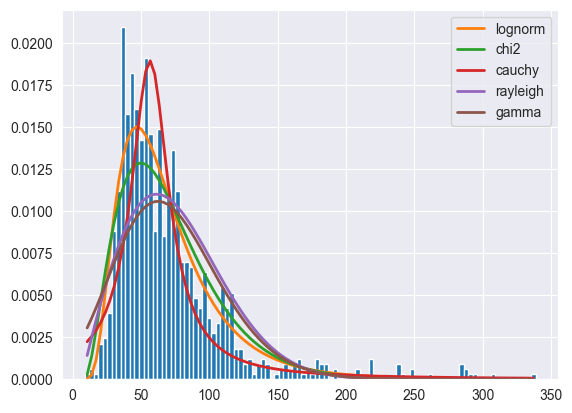

In [53]:
f = Fitter(wwo_data['Height_mean'],
          distributions = get_common_distributions()
          )
f.fit()
f.summary()

In [54]:
f.get_best(method='sumsquare_error'), f.get_best(method='bic')

({'lognorm': {'s': 0.5452517876786939,
   'loc': 5.001432055556959,
   'scale': 56.541037787836274}},
 {'lognorm': {'s': 0.5452517876786939,
   'loc': 5.001432055556959,
   'scale': 56.541037787836274}})

In [51]:
wwo_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'lat_', 'lon_', 'State_', 'Ta_mean',
       'Ta_min', 'Ta_max', 'Tsurf_mean', 'Tsurf_min', 'Tsurf_max',
       'Water_mean', 'Water_min', 'Water_max', 'Speed_mean', 'Speed_min',
       'Speed_max', 'Height_mean', 'Height_min', 'Height_max', 'Tdew_mean',
       'Tdew_min', 'Tdew_max', 'Friction_mean', 'Friction_min', 'Friction_max',
       'Date', 'Time', 'Direction_min', 'Direction_max', 'FullDate',
       'ClosestCity', 'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'location'],
      dtype='object')